<a href="https://colab.research.google.com/github/shashwath1278/Cube-buddy/blob/main/Crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!pip install pycaret

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("../corn yield.csv")
df

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"245,000",NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"36,015,000",NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"9,000",NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"34,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23469,SURVEY,1866,YEAR,NaN,STATE,VIRGINIA,51.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"16,200,000",NaN
23470,SURVEY,1866,YEAR,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"300,000",NaN
23471,SURVEY,1866,YEAR,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"7,800,000",NaN
23472,SURVEY,1866,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"500,000",NaN


In [93]:
df.isnull().sum()

,0
Program,0
Year,0
Period,0
Week Ending,23474
Geo Level,0
State,0
State ANSI,34
Ag District,23474
Ag District Code,23474
County,23474


In [94]:
cols_to_be_removed = ["Program","Week Ending","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","Watershed","CV (%)","Domain Category","Commodity","Geo Level","watershed_code","Domain"]

In [95]:
df.drop(columns=cols_to_be_removed,axis = 1,inplace=True)

In [96]:
df["State ANSI"].fillna(0,inplace=True)

In [97]:
df.isnull().sum()

,0
Year,0
Period,0
State,0
State ANSI,0
Data Item,0
Value,0


In [98]:
for x in df:
    print(x,df[x].value_counts(),sep="\n",end="\n")

Year
Year
2015    496
2012    483
2014    483
2013    376
1935    192
       ... 
1877     72
1878     72
1868     70
1867     70
1866     70
Name: count, Length: 150, dtype: int64
Period
Period
YEAR                   22352
YEAR - AUG FORECAST      264
YEAR - NOV FORECAST      264
YEAR - SEP FORECAST      264
YEAR - OCT FORECAST      207
YEAR - JUN FORECAST      123
Name: count, dtype: int64
State
State
ALABAMA           527
MARYLAND          527
WISCONSIN         527
VIRGINIA          527
TEXAS             527
TENNESSEE         527
SOUTH CAROLINA    527
PENNSYLVANIA      527
OHIO              527
NORTH CAROLINA    527
NEW YORK          527
NEW JERSEY        527
MISSOURI          527
MISSISSIPPI       527
MINNESOTA         527
MICHIGAN          527
NEBRASKA          527
INDIANA           527
LOUISIANA         527
KENTUCKY          527
KANSAS            527
IOWA              527
ARKANSAS          527
DELAWARE          527
GEORGIA           527
ILLINOIS          527
CALIFORNIA        527

In [99]:
df["Value"] = df["Value"].str.replace(',','')
df["State ANSI"] = df["State ANSI"].astype("int")
df["Value"] = df["Value"].astype("float")

In [100]:
def one_hot_encoding(df,column):
    one_hot_encoder=ce.OneHotEncoder(cols=column,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [101]:
df = one_hot_encoding(df,"Period")
df = one_hot_encoding(df,"Data Item")
df = one_hot_encoding(df,"State")

In [102]:
X = df.drop("Value",axis = 1)
Y = df["Value"]

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

In [104]:
train,test = train_test_split(df, test_size=0.25,random_state= 27)


In [105]:
experiment = setup(
    data = train,
    target = 'Value',
    imputation_type='iterative'
)

,Description,Value
0,Session id,3124
1,Target,Value
2,Target type,Regression
3,Original data shape,"(17605, 62)"
4,Transformed data shape,"(17605, 62)"
5,Transformed train set shape,"(12323, 62)"
6,Transformed test set shape,"(5282, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,iterative


In [106]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5938563.0500,546621420575129.6250,22840786.0000,0.9761,4.9587,16426.5280,0.3540
rf,Random Forest Regressor,4790402.8132,561657713483465.3125,23176600.7671,0.9749,0.3132,0.1801,6.5000
et,Extra Trees Regressor,5020850.3442,612073017446441.3750,24331644.2942,0.9729,0.2944,0.1615,7.7380
dt,Decision Tree Regressor,5315333.2954,673156507627845.0000,25602921.0940,0.9691,0.3432,0.1931,0.1920
lightgbm,Light Gradient Boosting Machine,8287087.9246,759535673982004.6250,27250736.0718,0.9669,5.0141,25205.4365,0.9950
gbr,Gradient Boosting Regressor,20286710.5483,3176218455502689.0000,55785622.5441,0.8660,6.3029,104517.7596,1.3500
knn,K Neighbors Regressor,39213864.8000,14139931811957964.0000,118071476.0000,0.3949,6.0907,414774.6375,0.2150
ridge,Ridge Regression,60791945.0908,17361878895634366.0000,130546004.2650,0.2714,7.6890,817969.1605,0.1220
llar,Lasso Least Angle Regression,60875336.8177,17362930324050838.0000,130553183.1816,0.2712,7.6917,820894.7202,0.1390
lasso,Lasso Regression,60875334.5738,17362930317275526.0000,130553183.1087,0.2712,7.6917,820894.6466,1.2100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=3124, ...)

In [107]:
!pip install xgboost
from xgboost import XGBRegressor

In [108]:
xgb_reg = XGBRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [110]:
xgb_reg.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [113]:
Y_pred = xgb_reg.predict(X_test)

In [116]:
mse = mean_squared_error(Y_pred,Y_test)
mse

1138115274923048.0

In [117]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

12379612.010906883

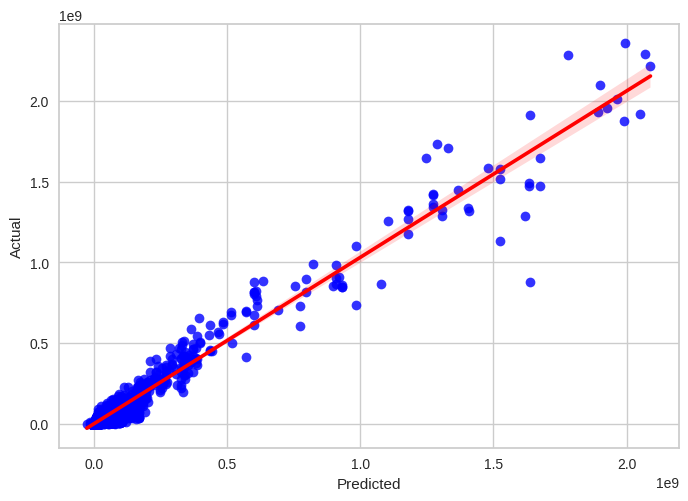

In [122]:
plot = sns.regplot(x=Y_pred, y=Y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plot.set(xlabel="Predicted", ylabel="Actual")

plt.show()